In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df =pd.read_csv("data.csv")

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA



In [ ]:
df = df.iloc[:,:-1]
print("This WBCD dataset is consisted of",df.shape)

This WBCD dataset is consisted of (569, 32)


In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
train,test = train_test_split(df, test_size=0.3, random_state=42)
print("Training Data :",train.shape)
print("Testing Data :",test.shape)

Training Data : (398, 32)
Testing Data : (171, 32)


In [ ]:
train_id = train['id']
test_id = test['id']

train_data = train.iloc[:,1:]
test_data = test.iloc[:,1:]

print("Training Data :",train_data.shape)
print("Testing Data :",test_data.shape)

Training Data : (398, 31)
Testing Data : (171, 31)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Training Data
train_x = train_data.iloc[:,1:]
train_x = MinMaxScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

# Testing Data
test_x = test_data.iloc[:,1:]
test_x = MinMaxScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)

Training Data : (398, 30)
Testing Data : (171, 30)


In [ ]:
# Training Data
train_y = train_data.iloc[:,:1]
train_y[train_y=='M'] = 0
train_y[train_y=='B'] = 1
print("Training Data :", train_y.shape)

# Testing Data
test_y = test_data.iloc[:,:1]
test_y[test_y=='M'] = 0
test_y[test_y=='B'] = 1
print("Testing Data :", test_y.shape)

Training Data : (398, 1)
Testing Data : (171, 1)


<ipython-input-12-0f762d552dbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y[train_y=='M'] = 0
<ipython-input-12-0f762d552dbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y[train_y=='M'] = 0
<ipython-input-12-0f762d552dbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y[train_y=='B'] = 1
<ipy

In [ ]:

# ANN model cretde

In [ ]:
test_y

,diagnosis
204,1
70,0
131,0
431,1
540,1
...,...
69,1
542,1
176,1
501,0


In [ ]:
train_x

array([[0.29624369, 0.27730808, 0.28381849, ..., 0.21839623, 0.15474078,
        0.12800949],
       [0.27812332, 0.22590463, 0.26940639, ..., 0.32576197, 0.09520993,
        0.18006104],
       [0.34276899, 0.14440311, 0.355879  , ..., 0.40203193, 0.24876799,
        0.31400475],
       ...,
       [0.32317939, 0.2404464 , 0.29937215, ..., 0.12093614, 0.17602996,
        0.05222109],
       [0.30799745, 0.33513696, 0.3052226 , ..., 0.66291727, 0.31815494,
        0.42777213],
       [0.21984426, 0.36557322, 0.20605023, ..., 0.2696299 , 0.22255076,
        0.11648016]])

In [ ]:
train_x.ndim

2

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model =Sequential()


model.add(Dense(64, activation='relu', input_shape=(30,)))   # Assuming 29 features
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                1984      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2049 (8.00 KB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
train_x = train_x.astype('float32')
train_y = train_y.astype('float32')


test_x = train_x.astype('float32')
test_y = train_y.astype('float32')

In [ ]:
history = model.fit(train_x, train_y, batch_size=30, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 24ms/step - loss: 0.6919 - accuracy: 0.3805 - val_loss: 0.6684 - val_accuracy: 0.4500
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6594 - accuracy: 0.6258 - val_loss: 0.6375 - val_accuracy: 0.8625
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6295 - accuracy: 0.8868 - val_loss: 0.6070 - val_accuracy: 0.8875
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5963 - accuracy: 0.8899 - val_loss: 0.5729 - val_accuracy: 0.9000
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5631 - accuracy: 0.8868 - val_loss: 0.5404 - val_accuracy: 0.9000
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5302 - accuracy: 0.8836 - val_loss: 0.5086 - val_accuracy: 0.8875
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.4985 - accuracy: 0.8805 - val_loss: 0.4767 - val_accuracy: 0.8750
Epoch 8/100


In [ ]:
y_pred =model.predict(test_x)

13/13 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[9.84567642e-01],
       [9.80959833e-01],
       [8.94867778e-01],
       [9.87096310e-01],
       [9.39435184e-01],
       [3.01612735e-01],
       [8.94112289e-01],
       [9.88819301e-01],
       [9.36402082e-01],
       [9.38896477e-01],
       [8.75025511e-01],
       [9.98354495e-01],
       [3.90102528e-02],
       [2.19194149e-03],
       [2.41918638e-01],
       [5.30909598e-01],
       [8.60695362e-01],
       [1.41551690e-02],
       [9.90892231e-01],
       [3.84540508e-05],
       [9.61927891e-01],
       [9.89352882e-01],
       [9.97887313e-01],
       [9.96253550e-01],
       [1.07997678e-01],
       [7.03035712e-01],
       [9.98081088e-01],
       [7.46843143e-05],
       [9.96738076e-01],
       [9.71212626e-01],
       [9.99042153e-01],
       [2.93259945e-05],
       [9.91320133e-01],
       [1.25277502e-05],
       [3.58732723e-05],
       [9.96106446e-01],
       [9.93919134e-01],
       [9.10618961e-01],
       [1.26993045e-01],
       [9.98973608e-01],


In [ ]:
y_pred = y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(test_y,y_pred)

0.3743718592964824

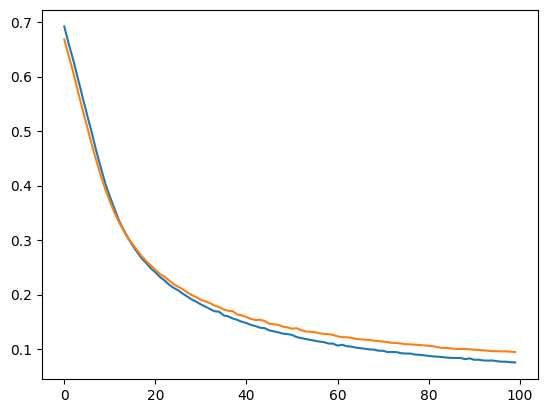

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

<Axes: >

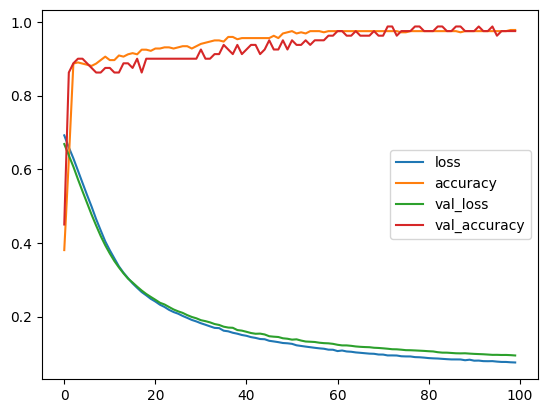

In [ ]:
pd.DataFrame(history.history).plot()